In [1]:
import sys, platform
import numpy as np, pandas as pd, matplotlib
import rasterio, statsmodels

print("Python:", sys.version.split()[0])
print("OS:", platform.platform())
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("rasterio:", rasterio.__version__)
import statsmodels.api as sm
print("statsmodels:", sm.__version__)


Python: 3.12.4
OS: Windows-11-10.0.22631-SP0
numpy: 2.3.2
pandas: 2.3.1
matplotlib: 3.10.5
rasterio: 1.4.3
statsmodels: 0.14.5


In [ ]:
#!pip install -q openeo rasterio numpy pandas matplotlib

In [3]:
import openeo

connection = openeo.connect("https://openeo.dataspace.copernicus.eu").authenticate_oidc()



Visit https://identity.dataspace.copernicus.eu/auth/realms/CDSE/device?user_code=QBDJ-CZFP 📋 to authenticate.

✅ Authorized successfully

Authenticated using device code flow.


# ATITLAN

In [4]:
lago_atitlan = {
    "west": -91.349, "east": -91.0702,
    "south": 14.5971, "north": 14.7648
}
lago_amatitlan = {
    "west": -90.66, "east": -90.58,
    "south": 14.43, "north": 14.51
}

fechas_atitlan = ["2025-02-01", "2025-02-05"]
fechas_amatitlan = ["2025-02-06", "2025-02-10"]

BANDS = ["B02","B03","B04","B08"]


In [5]:
atitlan_cube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent=lago_atitlan,
    temporal_extent=fechas_atitlan,
    bands=BANDS
)

atitlan_graph = atitlan_cube.save_result(format="GTIFF")

job = connection.create_job(atitlan_graph, title="S2 Atitlan bands B02,B03,B04,B08")
job.start_and_wait()

import os
os.makedirs("imgs", exist_ok=True)
job.download_results("imgs")



0:00:00 Job 'j-250812001910414fab0f64ff6ba17912': send 'start'
0:00:17 Job 'j-250812001910414fab0f64ff6ba17912': created (progress 0%)
0:00:22 Job 'j-250812001910414fab0f64ff6ba17912': created (progress 0%)
0:00:29 Job 'j-250812001910414fab0f64ff6ba17912': created (progress 0%)
0:00:37 Job 'j-250812001910414fab0f64ff6ba17912': created (progress 0%)
0:00:47 Job 'j-250812001910414fab0f64ff6ba17912': created (progress 0%)
0:00:59 Job 'j-250812001910414fab0f64ff6ba17912': running (progress N/A)
0:01:15 Job 'j-250812001910414fab0f64ff6ba17912': running (progress N/A)
0:01:34 Job 'j-250812001910414fab0f64ff6ba17912': running (progress N/A)
0:01:58 Job 'j-250812001910414fab0f64ff6ba17912': running (progress N/A)
0:02:29 Job 'j-250812001910414fab0f64ff6ba17912': finished (progress 100%)


C:\Users\diego\AppData\Local\Temp\ipykernel_13952\2603477457.py:15: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results("imgs")
d:\cosas\programass\UVG\Data Science\Laboratorio 4\.venv\Lib\site-packages\openeo\rest\job.py:199: UserDeprecationWarning: Call to deprecated method get_result. (Use `BatchJob.get_results` instead.) -- Deprecated since version 0.4.10.
  return self.get_result().download_files(target)
d:\cosas\programass\UVG\Data Science\Laboratorio 4\.venv\Lib\site-packages\openeo\rest\job.py:203: UserDeprecationWarning: Call to deprecated class _Result. (Use `JobResults` instead) -- Deprecated since version 0.4.10.
  return _Result(self)


{WindowsPath('imgs/openEO_2025-02-02Z.tif'): {'bands': [{'eo:center_wavelength': 0.4924,
    'eo:common_name': 'blue',
    'name': 'B02'},
   {'eo:center_wavelength': 0.5598, 'eo:common_name': 'green', 'name': 'B03'},
   {'eo:center_wavelength': 0.6646, 'eo:common_name': 'red', 'name': 'B04'},
   {'eo:center_wavelength': 0.8328, 'eo:common_name': 'nir', 'name': 'B08'}],
  'eo:bands': [{'center_wavelength': 0.4924,
    'common_name': 'blue',
    'name': 'B02'},
   {'center_wavelength': 0.5598, 'common_name': 'green', 'name': 'B03'},
   {'center_wavelength': 0.6646, 'common_name': 'red', 'name': 'B04'},
   {'center_wavelength': 0.8328, 'common_name': 'nir', 'name': 'B08'}],
  'href': 'https://openeo.dataspace.copernicus.eu/openeo/1.2/jobs/j-250812001910414fab0f64ff6ba17912/results/assets/YjIyZWRkM2YtNmY2NS00MTlhLWE2NmYtNmQzMzRkZTgyMzQ0/20c839d2e56a6753c72bd08122cb9b5f/openEO_2025-02-02Z.tif?expires=1755562900',
  'proj:bbox': [677700, 1614410, 707890, 1633210],
  'proj:epsg': 32615,
  'p

In [6]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

ruta_tif_atitlan = max(Path("imgs").glob("*.tif"), key=lambda p: p.stat().st_mtime)

with rasterio.open(ruta_tif_atitlan) as src:
    bandas = src.read()
    nodata = src.nodata
    descs = list(src.descriptions) if src.descriptions else []

bandas.shape, nodata, descs


((4, 1880, 3019), -32768.0, ['B02', 'B03', 'B04', 'B08'])

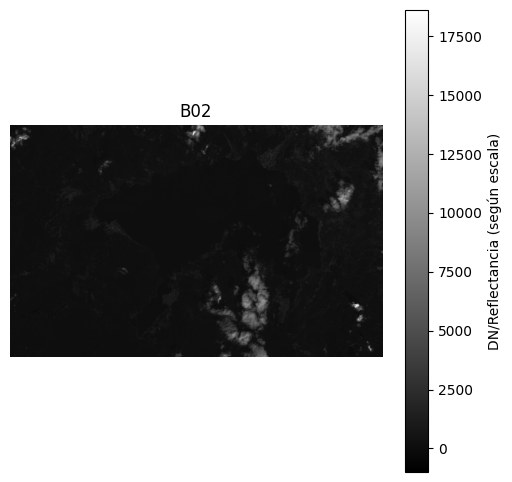

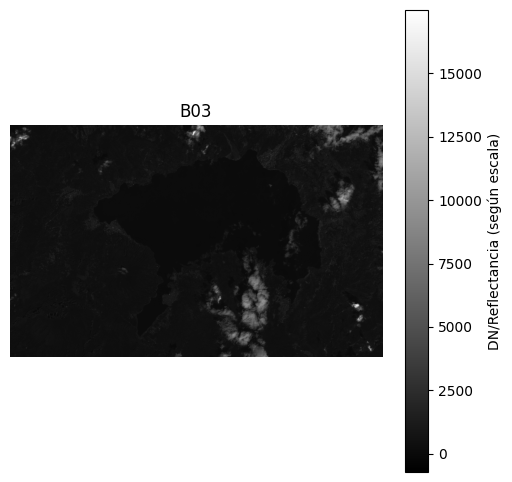

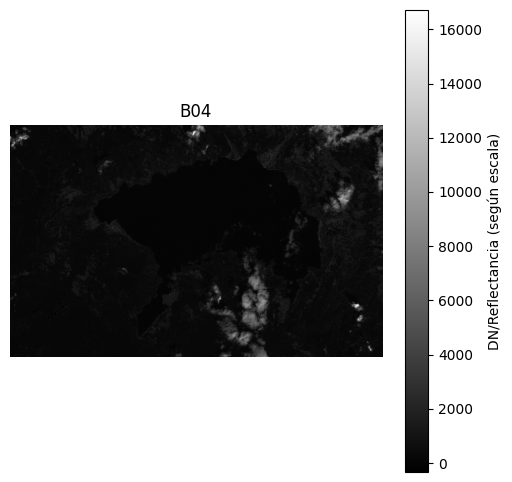

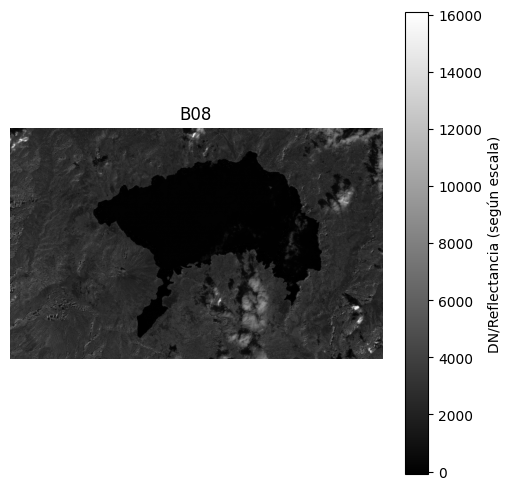

In [7]:
for i in range(bandas.shape[0]):
    plt.figure(figsize=(6,6))
    img = bandas[i].astype("float32")
    if nodata is not None:
        img = np.ma.masked_where(img == nodata, img)
    plt.imshow(img, cmap="gray")
    nombre = descs[i] if i < len(descs) and descs[i] else f"Banda {i+1}"
    plt.title(nombre)
    plt.axis('off')
    plt.colorbar(label="DN/Reflectancia (según escala)")
    plt.show()


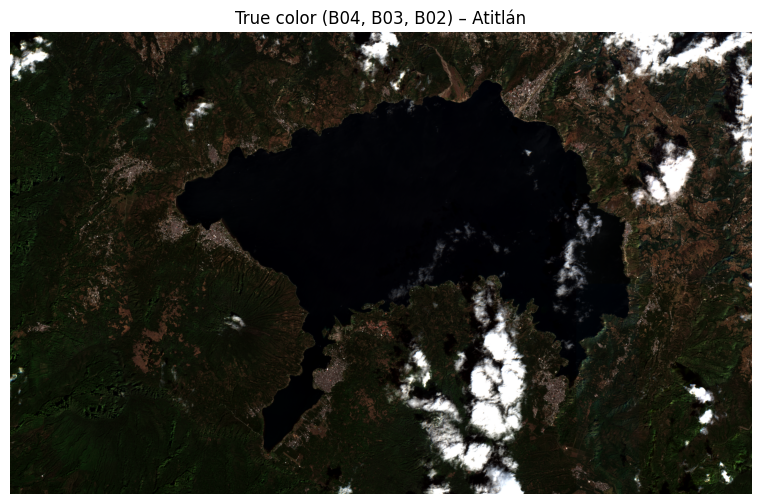

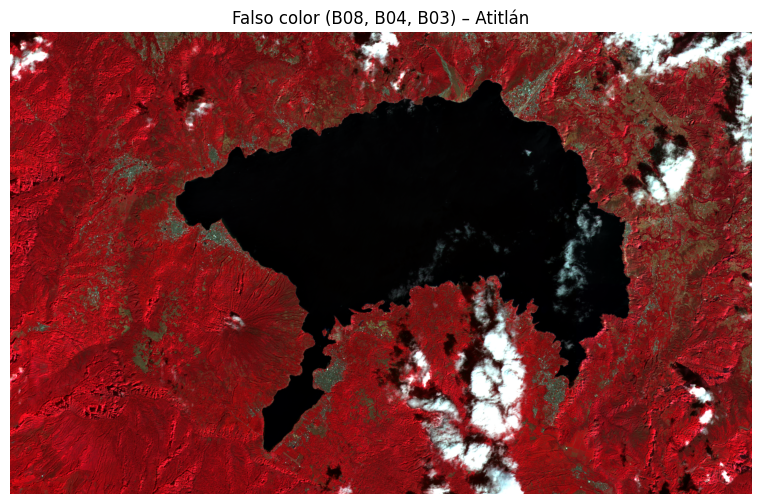

In [8]:
def normalize(b):
    b = b.astype("float32")
    valid = b[np.isfinite(b)]
    if valid.size == 0:
        return b
    p2, p98 = np.percentile(valid, (2, 98))
    return np.clip((b - p2) / (p98 - p2 + 1e-9), 0, 1)

blue  = bandas[0]
green = bandas[1]
red   = bandas[2]
nir   = bandas[3]

R = normalize(red)
G = normalize(green)
B = normalize(blue)

rgb_true = np.dstack([R, G, B])

plt.figure(figsize=(10,6))
plt.imshow(rgb_true)
plt.title("True color (B04, B03, B02) – Atitlán")
plt.axis('off')
plt.show()

N = normalize(nir)
rgb_false = np.dstack([N, R, G])

plt.figure(figsize=(10,6))
plt.imshow(rgb_false)
plt.title("Falso color (B08, B04, B03) – Atitlán")
plt.axis('off')
plt.show()


C:\Users\diego\AppData\Local\Temp\ipykernel_13952\417319843.py:9: RuntimeWarning: divide by zero encountered in divide
  (nir_f - red_f) / (nir_f + red_f)
C:\Users\diego\AppData\Local\Temp\ipykernel_13952\417319843.py:9: RuntimeWarning: invalid value encountered in divide
  (nir_f - red_f) / (nir_f + red_f)


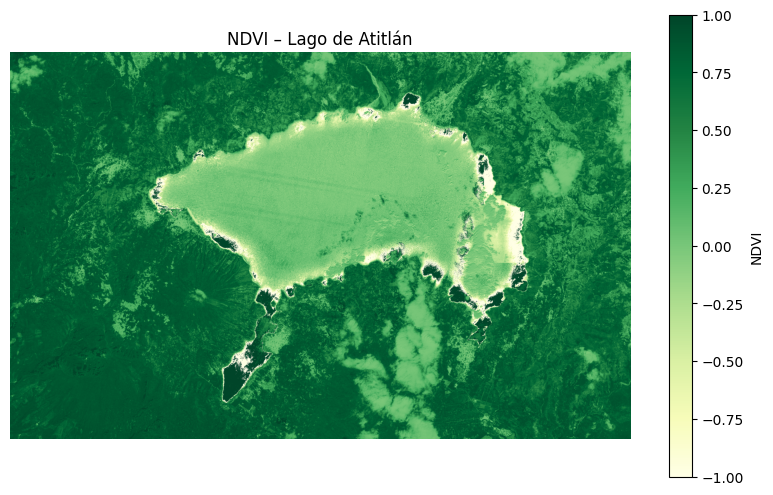

C:\Users\diego\AppData\Local\Temp\ipykernel_13952\417319843.py:21: RuntimeWarning: divide by zero encountered in divide
  (green_f - nir_f) / (green_f + nir_f)
C:\Users\diego\AppData\Local\Temp\ipykernel_13952\417319843.py:21: RuntimeWarning: invalid value encountered in divide
  (green_f - nir_f) / (green_f + nir_f)


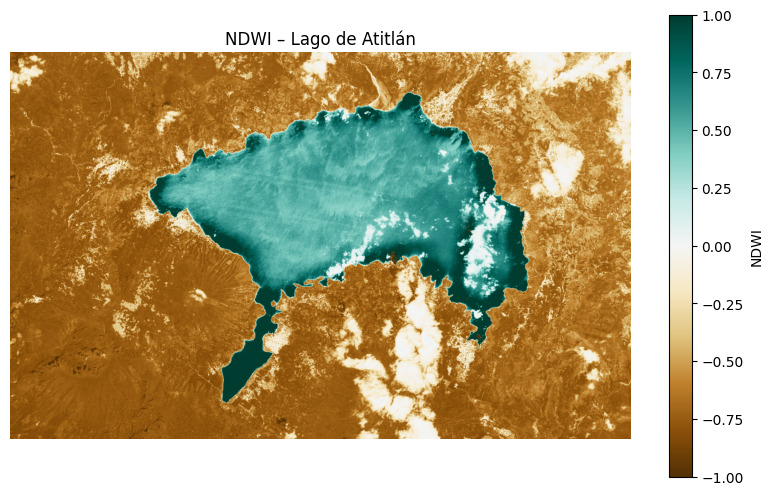

In [9]:
scale = 10000.0
red_f  = red.astype("float32")  / scale
nir_f  = nir.astype("float32")  / scale
green_f= green.astype("float32")/ scale
blue_f = blue.astype("float32") / scale

ndvi_atitlan = np.where(
    (nir_f + red_f) == 0, np.nan,
    (nir_f - red_f) / (nir_f + red_f)
)

plt.figure(figsize=(10,6))
plt.imshow(ndvi_atitlan, cmap='YlGn', vmin=-1, vmax=1)
plt.title("NDVI – Lago de Atitlán")
plt.colorbar(label="NDVI")
plt.axis('off')
plt.show()

ndwi_atitlan = np.where(
    (green_f + nir_f) == 0, np.nan,
    (green_f - nir_f) / (green_f + nir_f)
)

plt.figure(figsize=(10,6))
plt.imshow(ndwi_atitlan, cmap='BrBG', vmin=-1, vmax=1)
plt.title("NDWI – Lago de Atitlán")
plt.colorbar(label="NDWI")
plt.axis('off')
plt.show()


# AMATITLAN

In [10]:
amatitlan_cube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent=lago_amatitlan,
    temporal_extent=fechas_amatitlan,
    bands=BANDS
)

amatitlan_graph = amatitlan_cube.save_result(format="GTIFF")
job2 = connection.create_job(amatitlan_graph, title="S2 Amatitlan bands B02,B03,B04,B08")
job2.start_and_wait()

import os
os.makedirs("imgs", exist_ok=True)
job2.download_results("imgs")

ruta_tif_amatitlan = sorted(Path("imgs").glob("*.tif"), key=lambda p: p.stat().st_mtime)[-1]
ruta_tif_amatitlan


0:00:00 Job 'j-2508120031264db19a9e57dc2abd14fc': send 'start'
0:00:13 Job 'j-2508120031264db19a9e57dc2abd14fc': created (progress 0%)
0:00:18 Job 'j-2508120031264db19a9e57dc2abd14fc': created (progress 0%)
0:00:25 Job 'j-2508120031264db19a9e57dc2abd14fc': created (progress 0%)
0:00:33 Job 'j-2508120031264db19a9e57dc2abd14fc': created (progress 0%)
0:00:43 Job 'j-2508120031264db19a9e57dc2abd14fc': running (progress N/A)
0:00:56 Job 'j-2508120031264db19a9e57dc2abd14fc': running (progress N/A)
0:01:12 Job 'j-2508120031264db19a9e57dc2abd14fc': running (progress N/A)
0:01:31 Job 'j-2508120031264db19a9e57dc2abd14fc': running (progress N/A)
0:01:55 Job 'j-2508120031264db19a9e57dc2abd14fc': finished (progress 100%)


C:\Users\diego\AppData\Local\Temp\ipykernel_13952\841192583.py:14: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job2.download_results("imgs")
d:\cosas\programass\UVG\Data Science\Laboratorio 4\.venv\Lib\site-packages\openeo\rest\job.py:199: UserDeprecationWarning: Call to deprecated method get_result. (Use `BatchJob.get_results` instead.) -- Deprecated since version 0.4.10.
  return self.get_result().download_files(target)
d:\cosas\programass\UVG\Data Science\Laboratorio 4\.venv\Lib\site-packages\openeo\rest\job.py:203: UserDeprecationWarning: Call to deprecated class _Result. (Use `JobResults` instead) -- Deprecated since version 0.4.10.
  return _Result(self)


WindowsPath('imgs/openEO_2025-02-07Z.tif')

In [11]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

ruta_tif_amatitlan = max(Path("imgs").glob("*.tif"), key=lambda p: p.stat().st_mtime)

with rasterio.open(ruta_tif_amatitlan) as src:
    bandas = src.read()
    nodata = src.nodata
    descs = list(src.descriptions) if src.descriptions else []

bandas.shape, nodata, descs


((4, 896, 873), -32768.0, ['B02', 'B03', 'B04', 'B08'])

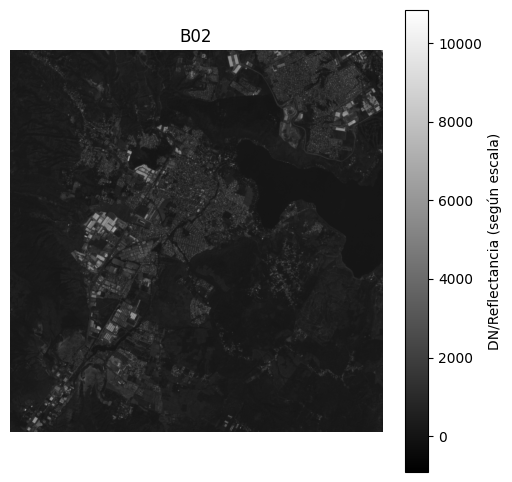

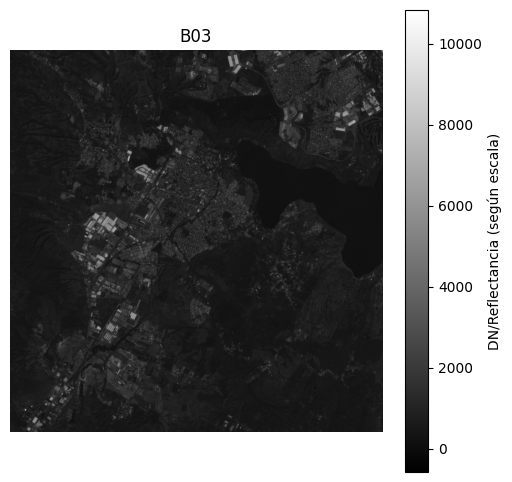

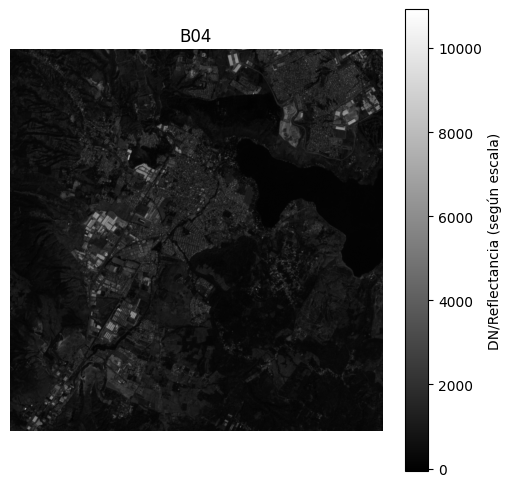

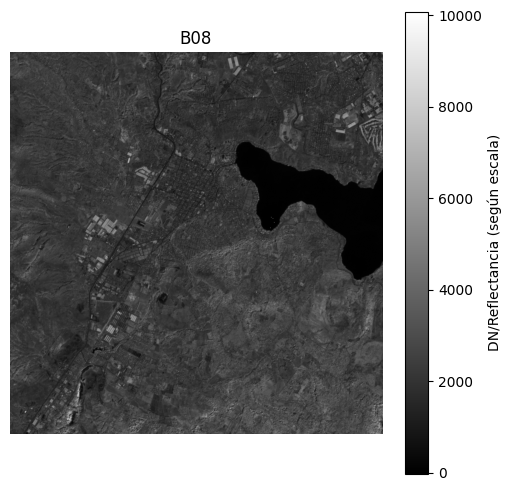

In [12]:
for i in range(bandas.shape[0]):
    plt.figure(figsize=(6,6))
    img = bandas[i].astype("float32")
    if nodata is not None:
        img = np.ma.masked_where(img == nodata, img)
    plt.imshow(img, cmap="gray")
    nombre = descs[i] if i < len(descs) and descs[i] else f"Banda {i+1}"
    plt.title(nombre)
    plt.axis('off')
    plt.colorbar(label="DN/Reflectancia (según escala)")
    plt.show()


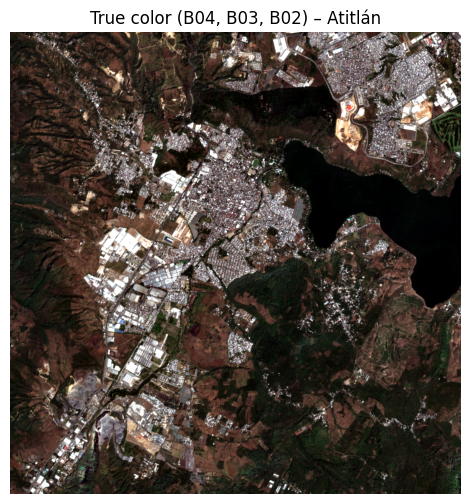

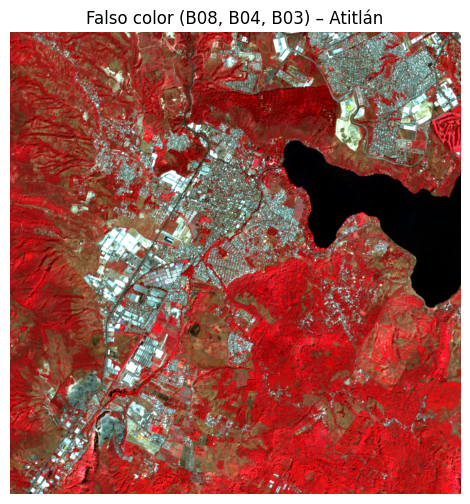

In [13]:
def normalize(b):
    b = b.astype("float32")
    valid = b[np.isfinite(b)]
    if valid.size == 0:
        return b
    p2, p98 = np.percentile(valid, (2, 98))
    return np.clip((b - p2) / (p98 - p2 + 1e-9), 0, 1)

blue  = bandas[0]
green = bandas[1]
red   = bandas[2]
nir   = bandas[3]

R = normalize(red)
G = normalize(green)
B = normalize(blue)

rgb_true = np.dstack([R, G, B])

plt.figure(figsize=(10,6))
plt.imshow(rgb_true)
plt.title("True color (B04, B03, B02) – Atitlán")
plt.axis('off')
plt.show()

N = normalize(nir)
rgb_false = np.dstack([N, R, G])

plt.figure(figsize=(10,6))
plt.imshow(rgb_false)
plt.title("Falso color (B08, B04, B03) – Atitlán")
plt.axis('off')
plt.show()


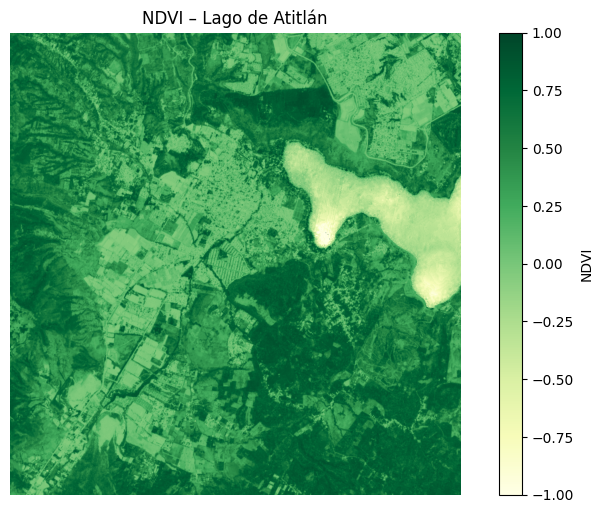

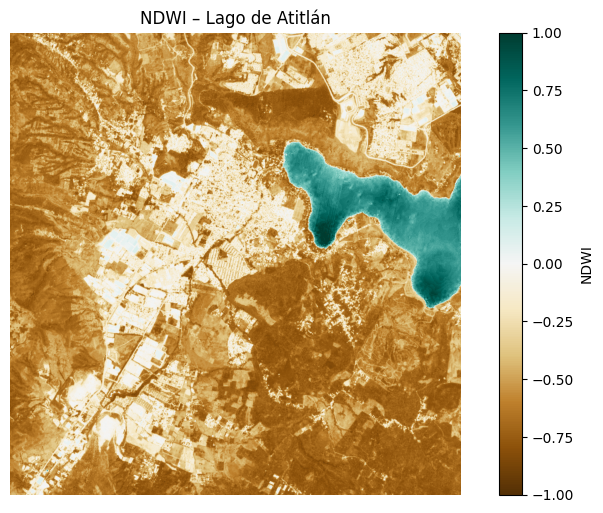

In [14]:
scale = 10000.0
red_f  = red.astype("float32")  / scale
nir_f  = nir.astype("float32")  / scale
green_f= green.astype("float32")/ scale
blue_f = blue.astype("float32") / scale

ndvi_atitlan = np.where(
    (nir_f + red_f) == 0, np.nan,
    (nir_f - red_f) / (nir_f + red_f)
)

plt.figure(figsize=(10,6))
plt.imshow(ndvi_atitlan, cmap='YlGn', vmin=-1, vmax=1)
plt.title("NDVI – Lago de Atitlán")
plt.colorbar(label="NDVI")
plt.axis('off')
plt.show()

ndwi_atitlan = np.where(
    (green_f + nir_f) == 0, np.nan,
    (green_f - nir_f) / (green_f + nir_f)
)

plt.figure(figsize=(10,6))
plt.imshow(ndwi_atitlan, cmap='BrBG', vmin=-1, vmax=1)
plt.title("NDWI – Lago de Atitlán")
plt.colorbar(label="NDWI")
plt.axis('off')
plt.show()


In [15]:
import openeo, os
from pathlib import Path

connection = openeo.connect("https://openeo.dataspace.copernicus.eu").authenticate_oidc()

BANDS_FULL = ["B02","B03","B04","B05","B07","B8A","B11","B12"]

lago_atitlan = {"west": -91.349, "east": -91.0702, "south": 14.5971, "north": 14.7648}
lago_amatitlan = {"west": -90.66, "east": -90.58, "south": 14.43, "north": 14.51}

fechas_atitlan    = ["2025-02-01", "2025-02-05"]
fechas_amatitlan  = ["2025-02-06", "2025-02-10"]

def download_s2_cube(aoi, dates, title, out_dir="imgs"):
    cube = connection.load_collection(
        "SENTINEL2_L2A",
        spatial_extent=aoi,
        temporal_extent=dates,
        bands=BANDS_FULL
    )
    graph = cube.save_result(format="GTIFF")
    job = connection.create_job(graph, title=title)
    job.start_and_wait()
    os.makedirs(out_dir, exist_ok=True)
    job.download_results(out_dir)
    tif = sorted(Path(out_dir).glob("*.tif"), key=lambda p: p.stat().st_mtime)[-1]
    return str(tif)

tif_atitlan   = download_s2_cube(lago_atitlan, fechas_atitlan,   "S2 Atitlan all bands")
tif_amatitlan = download_s2_cube(lago_amatitlan, fechas_amatitlan, "S2 Amatitlan all bands")

tif_atitlan, tif_amatitlan


Authenticated using refresh token.
0:00:00 Job 'j-2508120046004fed91a5139b5f3dc448': send 'start'
0:00:13 Job 'j-2508120046004fed91a5139b5f3dc448': queued (progress 0%)
0:00:18 Job 'j-2508120046004fed91a5139b5f3dc448': queued (progress 0%)
0:00:25 Job 'j-2508120046004fed91a5139b5f3dc448': queued (progress 0%)
0:00:33 Job 'j-2508120046004fed91a5139b5f3dc448': queued (progress 0%)
0:00:43 Job 'j-2508120046004fed91a5139b5f3dc448': queued (progress 0%)
0:00:55 Job 'j-2508120046004fed91a5139b5f3dc448': queued (progress 0%)
0:01:11 Job 'j-2508120046004fed91a5139b5f3dc448': running (progress N/A)
0:01:30 Job 'j-2508120046004fed91a5139b5f3dc448': running (progress N/A)
0:01:55 Job 'j-2508120046004fed91a5139b5f3dc448': running (progress N/A)
0:02:25 Job 'j-2508120046004fed91a5139b5f3dc448': finished (progress 100%)


C:\Users\diego\AppData\Local\Temp\ipykernel_13952\748424449.py:25: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results(out_dir)
d:\cosas\programass\UVG\Data Science\Laboratorio 4\.venv\Lib\site-packages\openeo\rest\job.py:199: UserDeprecationWarning: Call to deprecated method get_result. (Use `BatchJob.get_results` instead.) -- Deprecated since version 0.4.10.
  return self.get_result().download_files(target)
d:\cosas\programass\UVG\Data Science\Laboratorio 4\.venv\Lib\site-packages\openeo\rest\job.py:203: UserDeprecationWarning: Call to deprecated class _Result. (Use `JobResults` instead) -- Deprecated since version 0.4.10.
  return _Result(self)


0:00:00 Job 'j-25081200502441d5b226b271f37e4391': send 'start'
0:00:13 Job 'j-25081200502441d5b226b271f37e4391': created (progress 0%)
0:00:18 Job 'j-25081200502441d5b226b271f37e4391': created (progress 0%)
0:00:25 Job 'j-25081200502441d5b226b271f37e4391': created (progress 0%)
0:00:33 Job 'j-25081200502441d5b226b271f37e4391': created (progress 0%)
0:00:43 Job 'j-25081200502441d5b226b271f37e4391': running (progress N/A)
0:00:55 Job 'j-25081200502441d5b226b271f37e4391': running (progress N/A)
0:01:11 Job 'j-25081200502441d5b226b271f37e4391': running (progress N/A)
0:01:30 Job 'j-25081200502441d5b226b271f37e4391': running (progress N/A)
0:01:54 Job 'j-25081200502441d5b226b271f37e4391': finished (progress 100%)


('imgs\\openEO_2025-02-02Z.tif', 'imgs\\openEO_2025-02-07Z.tif')

In [16]:
import rasterio
import numpy as np

def load_bands(tif_path):
    with rasterio.open(tif_path) as src:
        data = src.read()
        nodata = src.nodata
        descs  = list(src.descriptions) if src.descriptions else []
    B02 = data[0].astype("float32")
    B03 = data[1].astype("float32")
    B04 = data[2].astype("float32")
    B05 = data[3].astype("float32")
    B07 = data[4].astype("float32")
    B8A = data[5].astype("float32")
    B11 = data[6].astype("float32")
    B12 = data[7].astype("float32")
    return dict(B02=B02, B03=B03, B04=B04, B05=B05, B07=B07, B8A=B8A, B11=B11, B12=B12), nodata

bands_atitlan, nodata_at = load_bands(tif_atitlan)
bands_amatitlan, nodata_am = load_bands(tif_amatitlan)


In [17]:
def to_reflectance(b, nodata=None, scale=10000.0):
    out = b.astype("float32")
    if nodata is not None:
        out = np.where(b == nodata, np.nan, out)
    return out / scale

def scale_all(bands, nodata=None):
    return {k: to_reflectance(v, nodata=nodata) for k,v in bands.items()}

R_at  = scale_all(bands_atitlan,  nodata=nodata_at)
R_am  = scale_all(bands_amatitlan, nodata=nodata_am)


In [18]:
def water_mask(R):
    B02, B03, B04, B05, B07, B8A, B11, B12 = R["B02"], R["B03"], R["B04"], R["B05"], R["B07"], R["B8A"], R["B11"], R["B12"]
    ndwi  = (B03 - B8A) / (B03 + B8A + 1e-9) 
    mndwi = (B03 - B11) / (B03 + B11 + 1e-9)
    aweish  = B02 + 2.5*B03 - 1.5*(B8A + B11) - 0.25*B12
    aweinsh = 4*(B03 - B11) - (0.25*B8A + 2.75*B11)
    ndvi = (B8A - B04) / (B8A + B04 + 1e-9)
    dbsi = ((B11 - B03) / (B11 + B03 + 1e-9)) - ndvi

    ws = ( (mndwi > 0.42) | (ndwi > 0.40) | (aweinsh > 0.1879) | (aweish > 0.1112) | (ndvi < -0.2) )
    ws = ws & ~((aweinsh <= -0.03) | (dbsi > 0))
    return ws

mask_water_at = water_mask(R_at)
mask_water_am = water_mask(R_am)


In [19]:
def FAI(B04, B07, B8A):
    return (B07 - (B04 + (B8A - B04) * (783 - 665) / (865 - 665)))

def NDCI(B04, B05):
    return (B05 - B04) / (B05 + B04 + 1e-9)

def compute_FAI_NDCI(R):
    B04, B05, B07, B8A = R["B04"], R["B05"], R["B07"], R["B8A"]
    fai  = FAI(B04, B07, B8A)
    ndci = NDCI(B04, B05)
    return fai, ndci

FAI_at, NDCI_at = compute_FAI_NDCI(R_at)
FAI_am, NDCI_am = compute_FAI_NDCI(R_am)


In [20]:
def chl_exp(ndci):
    return 17.441 * np.exp(4.7038 * ndci)

def chl_poly(ndci):
    return 826.57*(ndci**3) - 176.43*(ndci**2) + 19*ndci + 4.071


In [21]:
def chlorophyll_map(R, mask_water, ndci, fai, use_exp=True, exclude_floating=True):
    chl = chl_exp(ndci) if use_exp else chl_poly(ndci)
    chl = np.where(mask_water, chl, np.nan)
    if exclude_floating:
        chl = np.where(fai > 0.08, np.nan, chl)
    return chl

chl_at = chlorophyll_map(R_at, mask_water_at, NDCI_at, FAI_at, use_exp=True, exclude_floating=True)
chl_am = chlorophyll_map(R_am, mask_water_am, NDCI_am, FAI_am, use_exp=True, exclude_floating=True)


C:\Users\diego\AppData\Local\Temp\ipykernel_13952\3136291193.py:2: RuntimeWarning: overflow encountered in exp
  return 17.441 * np.exp(4.7038 * ndci)
C:\Users\diego\AppData\Local\Temp\ipykernel_13952\3136291193.py:2: RuntimeWarning: overflow encountered in multiply
  return 17.441 * np.exp(4.7038 * ndci)


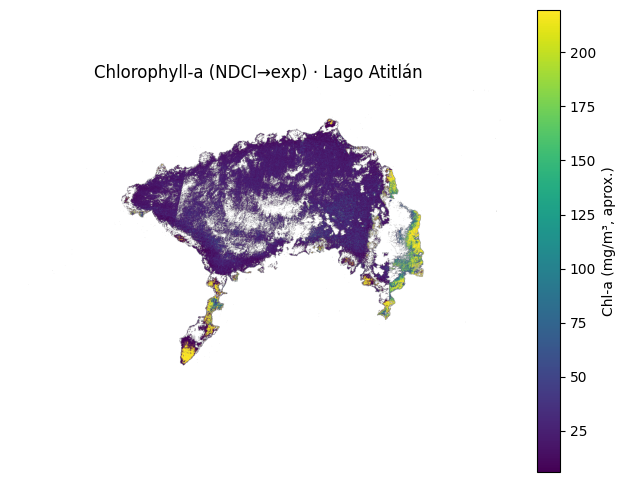

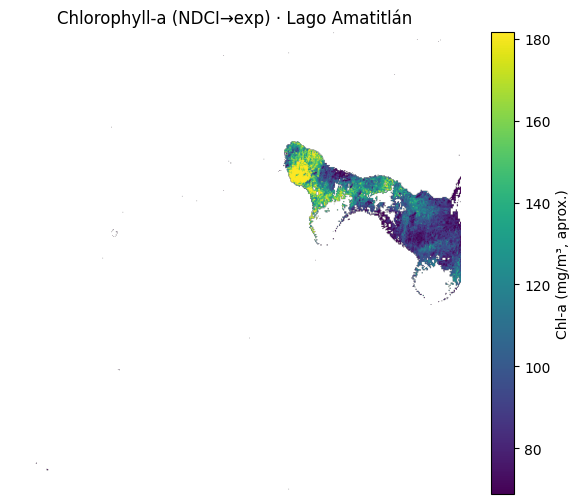

d:\cosas\programass\UVG\Data Science\Laboratorio 4\.venv\Lib\site-packages\numpy\_core\_methods.py:134: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


({'mean': inf,
  'median': 21.160381317138672,
  'p25': 15.247714042663574,
  'p75': 30.84520721435547,
  'n': 849802},
 {'mean': 111.01600646972656,
  'median': 102.27470397949219,
  'p25': 86.05685424804688,
  'p75': 128.96424865722656,
  'n': 32553})

In [22]:
import matplotlib.pyplot as plt

def show_chl(chl, title):
    plt.figure(figsize=(8,6))
    plt.imshow(chl, cmap="viridis", vmin=np.nanpercentile(chl,5), vmax=np.nanpercentile(chl,95))
    cbar = plt.colorbar(label="Chl-a (mg/m³, aprox.)")
    plt.title(title)
    plt.axis("off")
    plt.show()

show_chl(chl_at, "Chlorophyll-a (NDCI→exp) · Lago Atitlán")
show_chl(chl_am, "Chlorophyll-a (NDCI→exp) · Lago Amatitlán")

def summarize_chl(chl):
    arr = chl[np.isfinite(chl)]
    if arr.size == 0:
        return dict(mean=np.nan, median=np.nan, p25=np.nan, p75=np.nan, n=0)
    return dict(
        mean=float(arr.mean()),
        median=float(np.median(arr)),
        p25=float(np.percentile(arr,25)),
        p75=float(np.percentile(arr,75)),
        n=int(arr.size)
    )

sum_at = summarize_chl(chl_at)
sum_am = summarize_chl(chl_am)
sum_at, sum_am


In [23]:
import pandas as pd
from datetime import datetime

date_at = "2025-02-03"
date_am = "2025-02-08"

rows = [
    {"date": date_at, "lake": "Atitlán",    "chl_mean": sum_at["mean"], "chl_median": sum_at["median"], "chl_p25": sum_at["p25"], "chl_p75": sum_at["p75"]},
    {"date": date_am, "lake": "Amatitlán",  "chl_mean": sum_am["mean"], "chl_median": sum_am["median"], "chl_p25": sum_am["p25"], "chl_p75": sum_am["p75"]},
]

df = pd.DataFrame(rows)
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["lake","date"])
df


date       lake    chl_mean  chl_median    chl_p25     chl_p75
1 2025-02-08  Amatitlán  111.016006  102.274704  86.056854  128.964249
0 2025-02-03    Atitlán         inf   21.160381  15.247714   30.845207

In [ ]:
csv_path = "chl_timeseries_init.csv"
df.to_csv(csv_path, index=False, encoding="utf-8")
csv_path